<h1 style="color:brown">Reinforcement Learning</h1>

## Policy Gradient Methods

---

### Introduction

The previous chapters introduced two reinforcement learning methods, Q-learning and SARSA, based on value iteration. In this lesson, another type of policy gradient methods based on policy search will be introduced. This is a completely different idea, which is quite more abstract.

### Key Points

- Policy gradient<br>
- Policy gradient theorem<br>
- Monte Carlo policy gradient method<br>
- Actor-Critic policy gradient method

### Environment

- Python 3.6<br>
- Gym 0.10.5

---

## Introduction to Policy Gradient

In the previous lesson, we learned about the Q-learning algorithm, which is a typical reinforcement learning algorithm based on value iteration. In the mapping process: **state → action**, the value iteration based algorithm allows the system to explore according to the policy and update the state value at each of the steps.

So, in value-based iterations, we have several problems that cannot be avoided. For example, when the value of each of the states is updated, the probabilities of all the actions needs to be estimated. Different from the discrete action of the maze, considering the application of robot control and automatic driving, the massive state information brought by the continuous action makes the calculation process almost impossible.

At this time, Policy Gradient, a reinforcement learning algorithm based on policy iteration, emerges. The policy gradient no longer calculates rewards, but directly calculates the probability of taking certain actions in a certain state, and directly selects actions through probability.

If you are still embezzled after reading the above description, here is an example of David Silver in [Deep Reinforcement Learning Course](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Home.html). As shown in the maze below, there is a robot to find gold coins. We set that finding a gold coin rewards `+1` and encountering a bomb rewards `-1`. In particular, the robot cannot distinguish two gray areas, i.e., it cannot know whether it is in the gray area on the left or the one on the right:

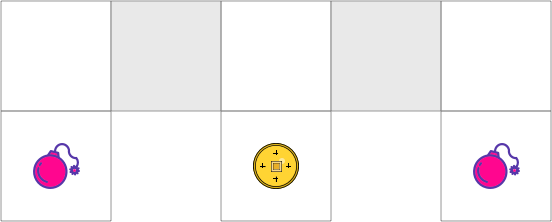

In [18]:
from IPython.display import Image
import os
Image("/kaggle/input/week9dataset/Policy Gradient Methods1.png")

If we adopt a value-based iterative approach, we will get a definite reward in a certain state. Therefore, the next action (left or right) of the gray (state) square is determined, that is, always to the left or to the right. This may result in the wrong cycle of falling into the left white grid or the adjacent gray grid as shown below, thus the gold coins can never be obtained:

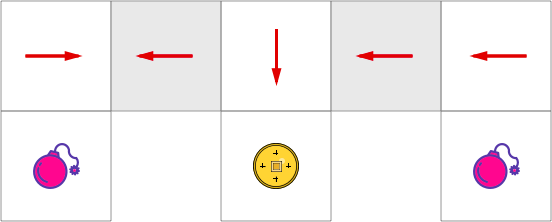

In [19]:
Image("/kaggle/input/week9dataset/Policy Gradient Methods2.png")

When using the policy iteration method, the probabilities that the learned policy takes action to the right and that for the left are 0.5 each so that it will not fall into the wrong cycle:

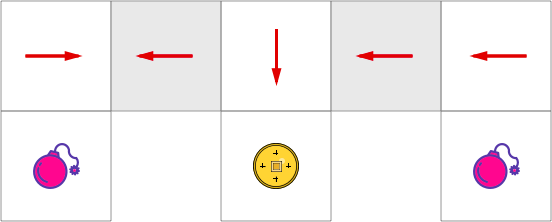

In [20]:
Image("/kaggle/input/week9dataset/Policy Gradient Methods2.png")

This is the advantage of the policy gradient method, which can handle continuous action scenarios where the value function is not applicable. In addition to this, thanks to the probabilistic output, the problem of value function certainty not being applicable in some scenarios is avoided.

## Derivation of Policy Gradient

### Derivation Process [Elective]

In reinforcement learning based on value iteration, we complete the learning by updating the value function:

$$
Q_{\theta}(s, a) = f( \phi (s, a), \theta) \tag{1}
$$

For reinforcement learning based on policy iteration, the learning is done directly by optimizing the policy function parameter $\theta$:

$$
\pi_\theta(s,a) = g( \phi (s, a), \theta) \tag{2}
$$

The ultimate goal of policy iteration is still the maximum reward of the system. In order to solve the optimal policy function $\pi_\theta(s,a)$, the objective function can also be used to measure the quality of the policy. This is like the process of selecting the square loss function in supervised learning to measure the error between a real value and the respective predicted value. Then we can update the parameters.

In general, according to the common types of problems, the three objective functions described below are commonly used.

The first objective function $J_1(\theta)$ applies to learning from a starting state every time:

$$
J_1(\theta)=V^{\pi_{\theta}}(s_1) = E_{\pi_{\theta}}[v_1] \tag{3}
$$

Here, $J_1(\theta)$ means if the Agent always starts from a certain state $s_1$ or accumulates rewards from the state $s_1$ to the termination state with a certain probability distribution, which is also called the _Start Value_. And, our goal is to maximize $J_1(\theta)$.

Alternatively, you can use the _Average Value_. For example, when you are in a continuous environment where there is no starting state, considering the state distribution of the Agent at a certain moment, for each of the possible states calculate the rewards if it continues to interact with the environment from that moment. The rewards are summed by the probability distribution of each state at that time. If you get `10` points in state `1` and `20` points in state `2`, then the target reward value is `15` points. The function of Average Value $J_{avV}(\theta)$ is as follows:

$$
J_{avV}(\theta) = \sum_{s} d^{\pi_{\theta}}(s) V^{\pi_{\theta}}(s) \tag{4}
$$

In addition to this, you can use another objective function: _Average reward per timestep_. In short, we can get the possibility that the Agent is in any state within a certain timestep. Then calculate the rewards that can be obtained by taking all the actions in each state, and finally sum all the rewards according to the probability distribution:

$$
J_{avR}(\theta) = \sum_{s} d^{\pi_{\theta}}(s) \sum_{a} \pi_{\theta}(s,a) R_{s,a} \tag{5}
$$

<div style="color: #999;font-size: 12px;font-style: italic;">*Note: $d^{\pi_\theta}(s)$ in equations $(4)$ and $(5)$ is a normal distribution of states of the Markov chain under the current policy.</div>

$J_{avR}(\theta)$ does not want to get a cumulative reward result, but averages the rewards that are immediately available, then assigns them to the pre-order state. In fact, the above three objective functions are the same in that all of them try to get the value of the Agent at a certain moment.

**With the value objective function, the next step is to maximize the value of the objective function by the optimization method and get the corresponding parameter $\theta$**. Therefore, reinforcement learning based on policy iteration actually returns to the optimization problem.

In supervised learning, we find the minimum value of the objective function through an algorithm called **gradient descent**. Nowadays, the problem of finding the maximum value of the objective function can also be done by gradients and the gradient ascent algorithm can be used here.

At this point, we make $J(\theta)$ any policy objective function and the policy gradient algorithm can raise $J(\theta)$ along its gradient to a local maximum. Also, determine the parameter $\theta$ corresponding to this local maximum:

$$
\Delta \theta  = \alpha \nabla_\theta J(\theta) \tag{6}
$$

$$
\nabla_\theta J(\theta) = 
\begin{pmatrix}
\frac{\partial J(\theta) }{\partial \theta _1}\\ 
\cdots\\ 
\frac{\partial J(\theta) }{\partial \theta _n}
\end{pmatrix} \tag{7}
$$

In the above formula, $\nabla_\theta J(\theta)$ is the policy gradient, and $\alpha$ is the learning rate.

For complex objective functions, gradients are often inconvenient to calculate. Therefore, the gradient can be estimated here by _the finite difference method_. Roughly in the vicinity of the gradient, using Taylor expansion and leaving only the linear part, the formula is as follows:

$$
\frac{\partial J(\theta)}{\partial \theta_k} \approx \frac{J(\theta+\epsilon u_k) - J(\theta)}{\epsilon} \tag{8}
$$

In formula $(8)$, $\epsilon$ represents the step size and $u_k$ is the unit vector. Using the finite difference method does not require the policy function to be differentiated, and there is no need to calculate the gradient. However, this method is only roughly estimated. Due to some noises, it is not as efficient as expected.

Since finite difference is not a good method, we have to use the method of calculating the gradient to update the policy, which requires the policy function to be differentiable. The factor **Likelihood ratios** is used here, where the gradient of a function at a variable $\theta$ is equal to the product of the function's value and the natural logarithm function of the function at this gradient:

$$
\nabla_\theta \pi_\theta (s,a)= \pi_\theta(s,a) \frac{\nabla \pi_\theta(s,a)}{\pi_\theta(s,a)} = \pi_\theta(s,a)
\nabla \log {\left(\pi_\theta(s,a)\right)} \tag{9}
$$

We also call $\nabla \ln{\left(\pi_\theta(s,a)\right)}$ _the score function_. The score function has a good property, that is, the logarithm function can turn the multiplication into addition to facilitate the derivation.

For example, when building a policy function using the well-known _Softmax function_ (detailed in the **Deep Learning** section) and linear functions:

$$
\pi_\theta(s,a) = \frac{e^{\phi(s,a)^T \theta}}{\sum_b e^{\phi(s,b)^T \theta}} \tag{10}
$$

At this point, the score function is:

$$
\nabla \log{\pi_\theta(s,a)} = \phi(s,a)^T - \sum_b \pi_\theta(s,b) \phi(s,b) = \phi(s,a)^T - \mathbb{E}_{\pi_\theta}[\phi(s, \cdot )] \tag{11}
$$

Or in a contiguous space, assuming that the action $a$ conforms to a Gaussian distribution, the policy uses a Gaussian distribution with a standard deviation of `1`. This policy is called a **Gaussian policy**. The score function of the Gaussian policy is:

$$
\nabla \log {\pi_\theta(s,a)} = \frac{(a - \mu(s))\phi(s)}{\sigma^2} \tag{12}
$$

### Policy Gradient Theorem

So far, our goal is actually to solve $\nabla _{\theta}J\left( \theta \right)$. Then, for any differentiable policy $\pi _{\theta}\left( s,a \right) $ and any policy's objective function $J_1(\theta)$, $J_{avV}(\theta) $, $J_{avR}(\theta)$, we have:

$$
\\\nabla _{\theta}J\left( \theta \right) = \mathbb{E}_{\pi _{\theta}}\left[ \nabla _{\theta} \log \pi_\theta \left( s,a \right) Q^{\pi _\theta}\left( s,a \right) \right] \tag{13}
$$

Equation $(13)$ is also known as the policy gradient theorem. The theorem reveals the consistency of different objective functions when calculating gradients. Knowing how to calculate the gradient, the parameters can be calculated by the gradient ascent.

### Monte Carlo Policy Gradient Algorithm

To solve the policy gradient optimization problem, we need to calculate $\nabla _{\theta} \log \pi_\theta \left( s,a \right)$ and the value $Q^{\pi _\theta}\left( s , a \right)$. Based on the above, we can find $\nabla _{\theta} \log \pi_\theta \left( s,a \right)$, but how do we get the value of $Q^{\pi _\theta}\left( s , a \right)$?

The Monte Carlo policy gradient algorithm allows the system to generate a **state → action → reward** sequence,  the start to the end: $\{s_1 , a_1 , r_2 , \cdots , s_ {T−1} , a_{T−1} , r_{T} \} \sim \pi_{\theta}$. Next the algorithm randomly initializes the parameter $\theta$ and takes the $v_t$ value for $t=1$ to $t=T-1$ as $Q^{\pi _\theta}\left( s_t , a_t \right)$ thus to solve the optimization problem.

The pseudocode of the Monte Carlo policy gradient algorithm is as follows:

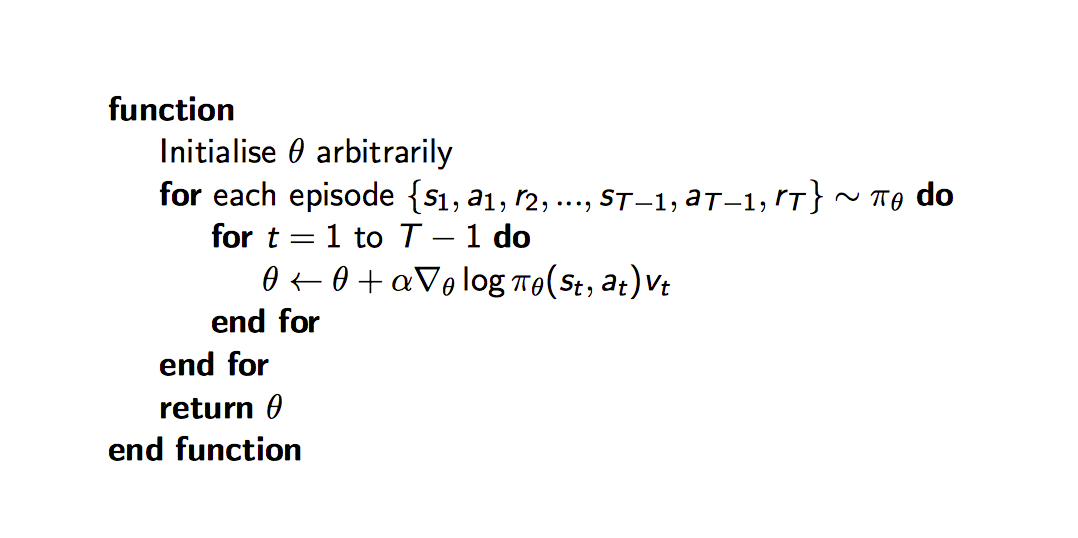

In [21]:
Image("/kaggle/input/week9dataset/Policy Gradient Methods4.png")

### Actor-Critic Policy Gradient Algorithm

In addition to the Monte Carlo algorithm, there is another algorithm called **Actor-Critic policy gradient algorithm**. A big drawback of the Monte Carlo is the high variance. It is great if the state value can be estimated relatively accurately by some mechanism and used to guide the policy update. This is the case with the Actor-Critic algorithm, which is divided into two parts: **Actor** and **Critic**. Here Actor is responsible for updating the policy and Critic is responsible for updating the value. When Critic updates the value, it is actually the Q-learning algorithm or the SARSA algorithm.

Therefore, the Actor-Critic policy gradient algorithm combines the advantages of value iteration and policy iteration both. The pseudocode for Actor-Critic policy gradient algorithm is as follows:

In [22]:
Image("/kaggle/input/week9dataset/Policy Gradient Methods5.png")

## Implementation of Policy Gradient Algorithms

The above abstract theoretical introduction may seem confusing. If you can't understand it fully, now combine it with the following examples.

To implement the policy gradient algorithm, we use `CartPole-v1` environment in Gym, which is shown below:

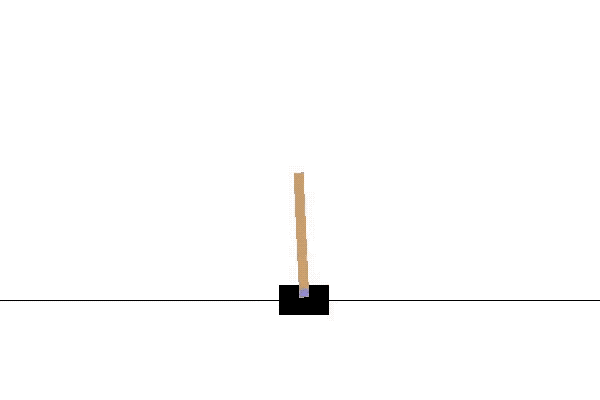

In [23]:
Image("/kaggle/input/week9dataset/Policy Gradient Methods6.gif")

**The description of the environment is:** A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity. If the pole angle is more than `15` degrees or the cart position is more than `2.4` units, the game ends immediately. Reward is `1` for every step taken, including the termination step:

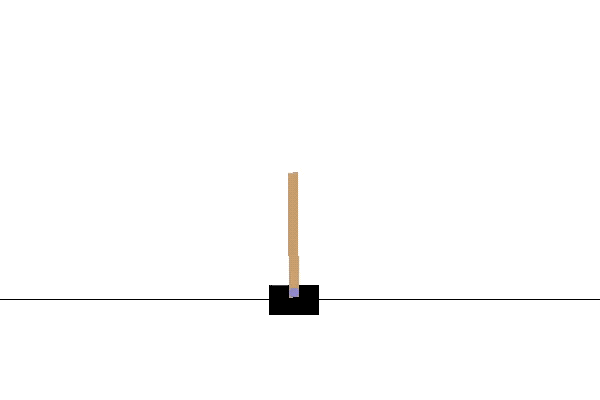

In [24]:
Image("/kaggle/input/week9dataset/Policy Gradient Methods7.gif")

Below we load the `CartPole-v1` environment through Gym. Since Notebook does not support visualizing the `CartPole-v1` environment, rendering operations cannot be performed:

In [25]:
import gym

In [26]:
env = gym.make('CartPole-v1')

We try to see how many timesteps each episode can persist for with random actions:

In [27]:
for _ in range(10):
    t = 0
    env.reset()
    while True:
        action = env.action_space.sample()
        observation, reward, done, _ = env.step(action)
        t += 1
        if done:
            print("Episode finished after {} timesteps".format(t))
            break

Episode finished after 36 timesteps
Episode finished after 42 timesteps
Episode finished after 29 timesteps
Episode finished after 11 timesteps
Episode finished after 12 timesteps
Episode finished after 33 timesteps
Episode finished after 16 timesteps
Episode finished after 36 timesteps
Episode finished after 36 timesteps
Episode finished after 18 timesteps


You can see that under random action the timesteps of any Episode typically does not exceed `50`. The timesteps here actually correspond to the cumulative reward value of the Episode.

Next we implement the reinforcement learning algorithm based on the Monte Carlo policy gradient pseudocode provided above:


Monte Carlo policy gradient algorithm<br>


In [28]:
def mc_policy_gradient(env, theta, lr, episodes):
    """
    Parameters:
    env -- Environment
    theta -- The policy function parameter
    lr -- Learning rate
    episodes -- The number of iterations
    Returns: 
    episodes -- The cumulative reward value
    """
    for episode in range(episodes):  # Iterations
        episode = []
        start_observation = env.reset()  # Initialize the environment
        t = 0
        while True:
            policy = np.dot(theta, start_observation)  # Calculate the policy value
            # Here action_space is 2, so use Sigmoid
            pi = 1 / (1 + np.exp(-policy))
            if pi >= 0.5:
                action = 1  # Push cart to the right
            else:
                action = 0  # Push cart to the left
            next_observation, reward, done, _ = env.step(action)  # Take actions
            # Add the environment return result to the episode
            episode.append([next_observation, action, pi, reward])
            start_observation = next_observation  # Return observation as the next iteration observation
            t += 1
            if done:
                print("Episode finished after {} timesteps".format(t))
                break
        # Update theta
        for timestep in episode:
            observation, action, pi, reward = timestep
            theta += lr * (1 - pi) * np.transpose(-observation) * reward
    
    return theta

In [29]:
import numpy as np
lr = 0.001
theta = np.random.rand(4)
episodes=10

In [30]:
mc_policy_gradient(env, theta, lr, episodes)

Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 11 timesteps
Episode finished after 11 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps


array([0.439241  , 0.90459851, 0.54174763, 0.28578948])

It can be found that, with the introduction of Monte Carlo algorithm, each Episode typically reaches hundreds of timesteps (by default, `max_episode_steps = 500`). Of course, due to random initialization, sometimes it is impossible to get good learning results.

Moreover, we can implement the reinforcement learning algorithm based on the Actor-Critic policy gradient pseudocode provided above:


Actor-Critic policy gradient algorithm<br>


In [31]:
def ac_policy_gradient(env, theta, w, lr, gamma, episodes):
    done = True
    for _ in range(episodes):
        t = 0
        while True:
            if done:  # Determine whether to reset the environment based on the done value
                start_observation = env.reset()  # Initialize the environment
                # Choose actions based on policy
                policy = np.dot(theta, start_observation)
                start_pi = 1 / (1 + np.exp(-policy))
                if start_pi >= 0.5:
                    start_action = 1
                else:
                    start_action = 0
                start_q = np.dot(w, start_observation)  # Calculate Q
            observation, reward, done, _ = env.step(start_action)  # Take actions
            # Select the appropriate action based on the new policy
            policy = np.dot(theta, observation)
            pi = 1 / (1 + np.exp(-policy))
            if pi >= 0.5:
                action = 1
            else:
                action = 0
            q = np.dot(w, observation)
            # Update
            delta = reward + gamma * q - start_q
            theta += lr * (1 - start_pi) * np.transpose(-start_observation) * start_q
            w += lr * delta * np.transpose(start_observation)
            start_pi, start_observation, start_q, start_action = pi, observation, q, action
            t += 1
            if done:
                print("Episode finished after {} timesteps".format(t+1))
                break
    return theta, w

In [32]:
gamma = 1
theta = np.random.rand(4)
w = np.random.rand(4)
lr = 0.001
episodes=10

In [33]:
ac_policy_gradient(env, theta, w, lr, gamma, episodes)

Episode finished after 34 timesteps
Episode finished after 34 timesteps
Episode finished after 36 timesteps
Episode finished after 30 timesteps
Episode finished after 11 timesteps
Episode finished after 11 timesteps
Episode finished after 11 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps


(array([0.84287691, 0.44268757, 0.46885632, 0.20760906]),
 array([0.06776601, 0.11246775, 0.44152298, 0.90321523]))

Again, the maximum step size of each Episode here is limited to `500`. Of course, due to random initialization, sometimes good learning results are not obtained as well. However, if you pass the parameters of a better result back into the function, you will get better results almost every time, which is the process of continuous reinforcement learning.

## Summary

In this chapter, we learned what policy gradient learning is and derived it mathematically. At the end of the chapter, Monte Carlo algorithm and Actor-Critic algorithm were implemented for `CartPole-v1` in Gym. The knowledge points are:<br>
<br>
- Policy gradient<br>
- Policy gradient theorem<br>
- Monte Carlo policy gradient method<br>
- Actor-Critic policy gradient method